# `CLASSIFICATION MODEL COMPARISON (TRAIN & TEST)`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    classification_report, precision_score, recall_score, f1_score,
    RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle

# Store results
classification_results = []


In [ ]:
# Load Dataset

df = pd.read_csv('/content/sy.csv')

# Ensure time ordering before split
df = df.sort_values('arrival_time').reset_index(drop=True)

# Select Features & Target
cat_feats = ['mode_of_arrival', 'chief_complaint', 'age_bucket']
num_feats = [
    'triage_level', 'age', 'hour_of_day', 'day_of_week',
    'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'is_weekend',
    'is_ambulance', 'triage_x_age', 'triage_x_ambulance',
    'arrivals_last_60m', 'is_busy_period'
]

X = df[cat_feats + num_feats]
y = df['is_admitted'].astype(int)


In [ ]:
# Time-Based Train-Test Split

split_idx = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [ ]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats),
        ('num', StandardScaler(), num_feats)
    ]
)

# Logistic Regression

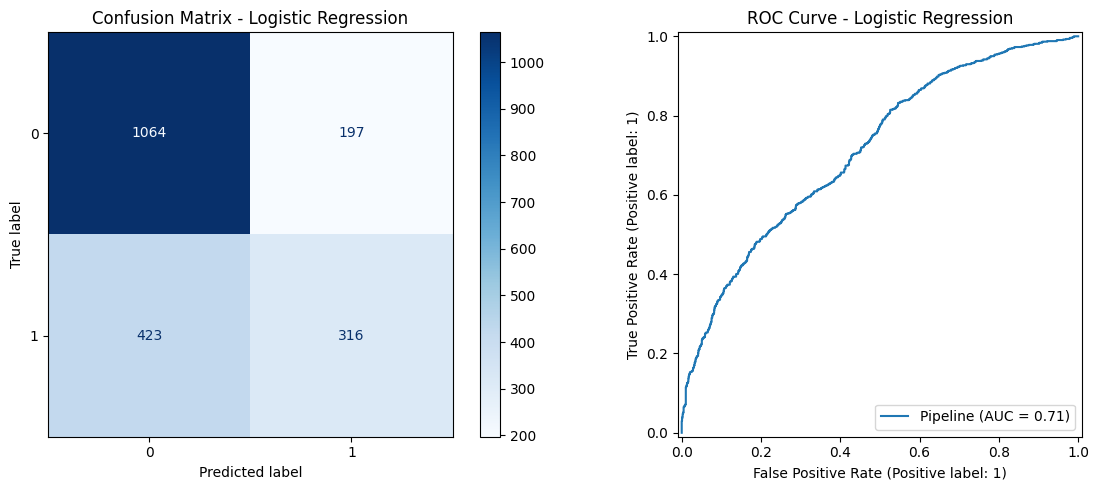

In [ ]:

log_clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])
log_clf.fit(X_train, y_train)

y_pred_train = log_clf.predict(X_train)
y_pred_test = log_clf.predict(X_test)
y_prob_test = log_clf.predict_proba(X_test)[:, 1]

classification_results.append({
    'Model': 'Logistic Regression',
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-score': f1_score(y_test, y_pred_test),
    'ROC-AUC': roc_auc_score(y_test, y_prob_test)
})

# --- Logistic Regression Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(log_clf, X_test, y_test, cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix - Logistic Regression")
RocCurveDisplay.from_estimator(log_clf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve - Logistic Regression")
plt.tight_layout()
plt.show()


# **Random Forest**

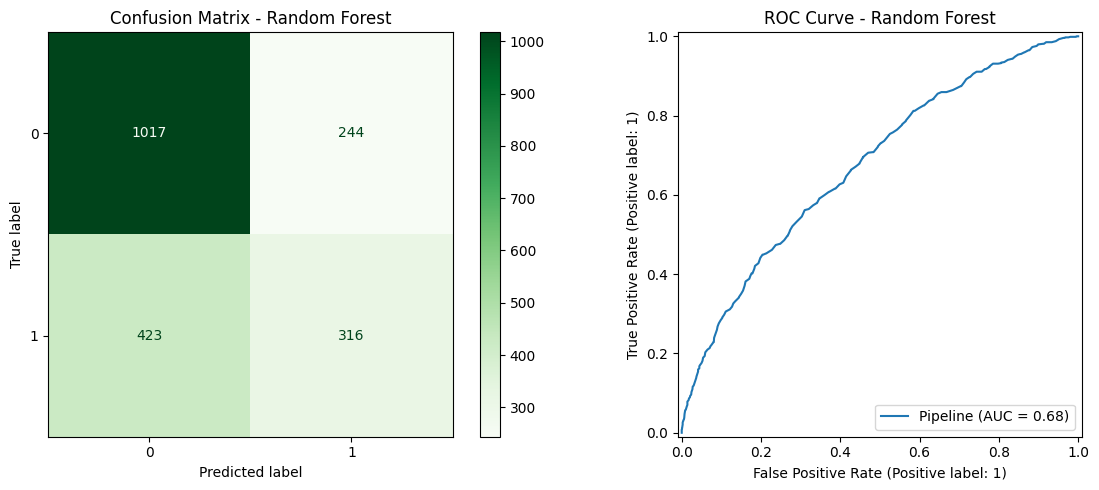

In [ ]:
rf_clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])
rf_clf.fit(X_train, y_train)

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
y_prob_test = rf_clf.predict_proba(X_test)[:, 1]

classification_results.append({
    'Model': 'Random Forest',
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-score': f1_score(y_test, y_pred_test),
    'ROC-AUC': roc_auc_score(y_test, y_prob_test)
})

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap='Greens', ax=ax[0])
ax[0].set_title("Confusion Matrix - Random Forest")
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve - Random Forest")
plt.tight_layout()
plt.show()


# **XGBoost Classifier**

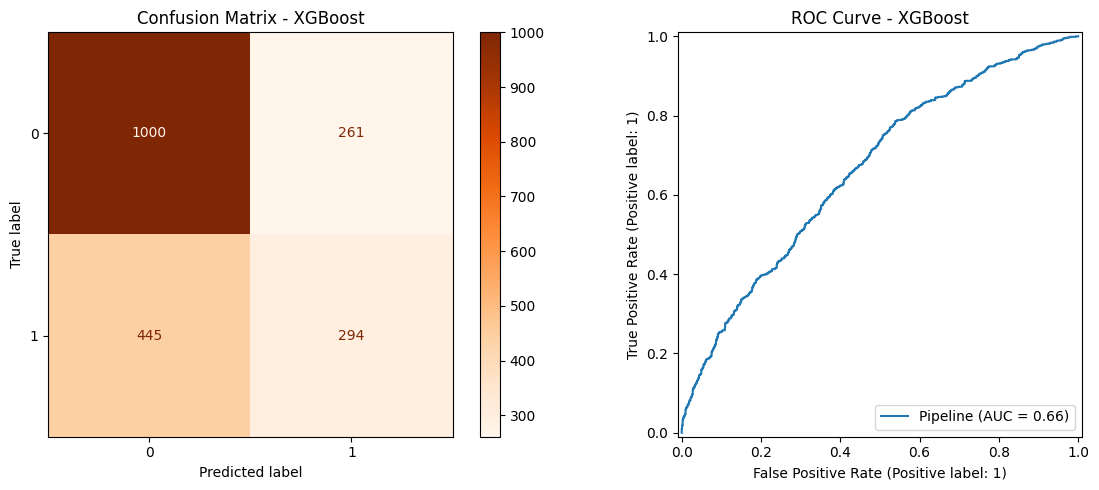

In [ ]:

xgb_clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier(eval_metric='logloss', random_state=42))
])
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)
y_prob_test = xgb_clf.predict_proba(X_test)[:, 1]

classification_results.append({
    'Model': 'XGBoost Classifier',
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-score': f1_score(y_test, y_pred_test),
    'ROC-AUC': roc_auc_score(y_test, y_prob_test)
})

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap='Oranges', ax=ax[0])
ax[0].set_title("Confusion Matrix - XGBoost")
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve - XGBoost")
plt.tight_layout()
plt.show()

# **Support Vector Machine (RBF)**

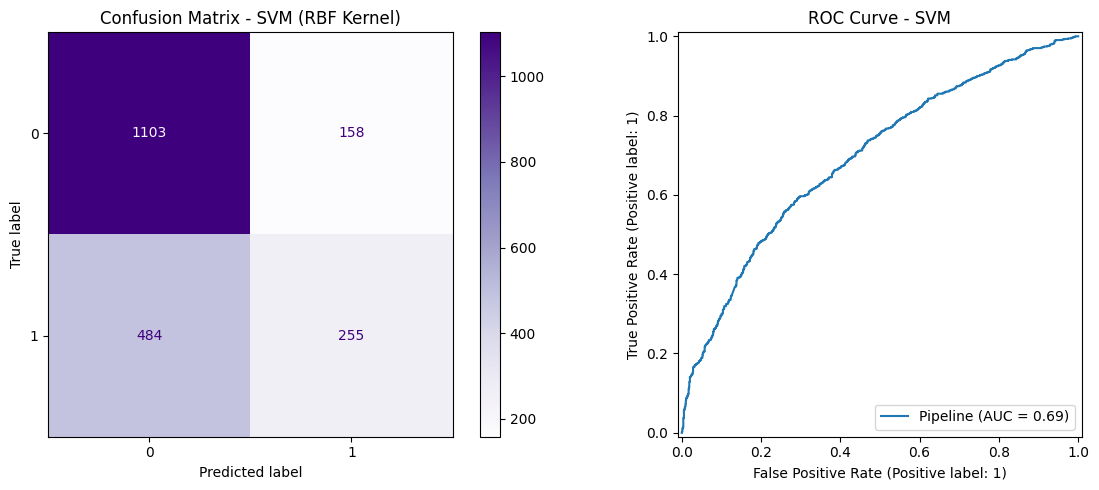

In [ ]:
svm_clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC(probability=True, kernel='rbf'))
])
svm_clf.fit(X_train, y_train)

y_pred_train = svm_clf.predict(X_train)
y_pred_test = svm_clf.predict(X_test)
y_prob_test = svm_clf.predict_proba(X_test)[:, 1]

classification_results.append({
    'Model': 'Support Vector Machine',
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-score': f1_score(y_test, y_pred_test),
    'ROC-AUC': roc_auc_score(y_test, y_prob_test)
})

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(svm_clf, X_test, y_test, cmap='Purples', ax=ax[0])
ax[0].set_title("Confusion Matrix - SVM (RBF Kernel)")
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve - SVM")
plt.tight_layout()
plt.show()



# Gradient Boosting Classifier

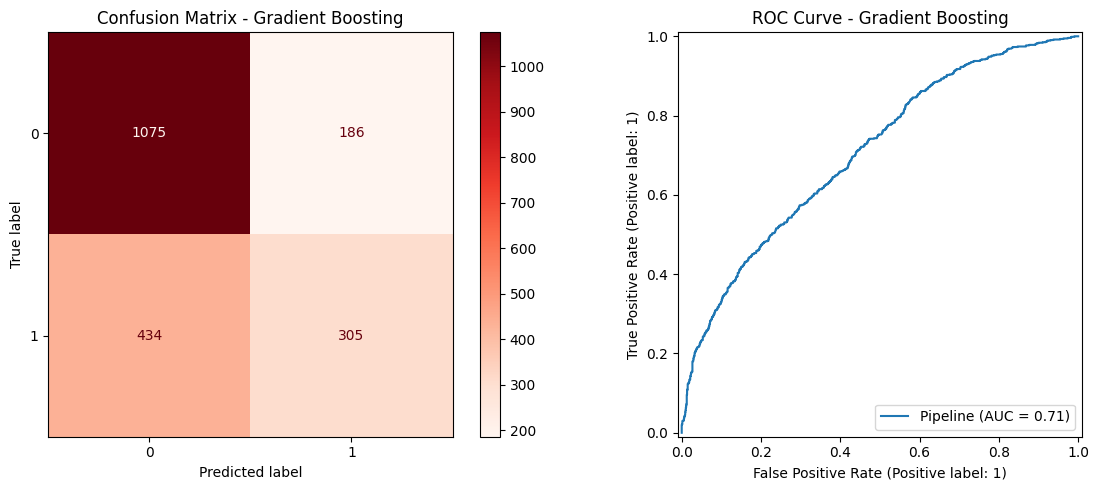

In [ ]:
gb_clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])
gb_clf.fit(X_train, y_train)

y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)
y_prob_test = gb_clf.predict_proba(X_test)[:, 1]

classification_results.append({
    'Model': 'Gradient Boosting Classifier',
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-score': f1_score(y_test, y_pred_test),
    'ROC-AUC': roc_auc_score(y_test, y_prob_test)
})

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(gb_clf, X_test, y_test, cmap='Reds', ax=ax[0])
ax[0].set_title("Confusion Matrix - Gradient Boosting")
RocCurveDisplay.from_estimator(gb_clf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve - Gradient Boosting")
plt.tight_layout()
plt.show()



# **Model Comparison**

=== Classification Model Comparison ===


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.682250,0.6900,0.615984,0.427605,0.504792,0.712069
5,Gradient Boosting Classifier,0.695750,0.6900,0.621181,0.412720,0.495935,0.706266
4,Support Vector Machine,0.706750,0.6790,0.617433,0.345061,0.442708,0.693917
1,Random Forest,0.998875,0.6665,0.564286,0.427605,0.486528,0.675872
3,XGBoost Classifier,0.864500,0.6470,0.529730,0.397835,0.454405,0.663604
2,XGBoost Classifier,0.864500,0.6470,0.529730,0.397835,0.454405,0.663604



🏆 Best Classification Model: Logistic Regression


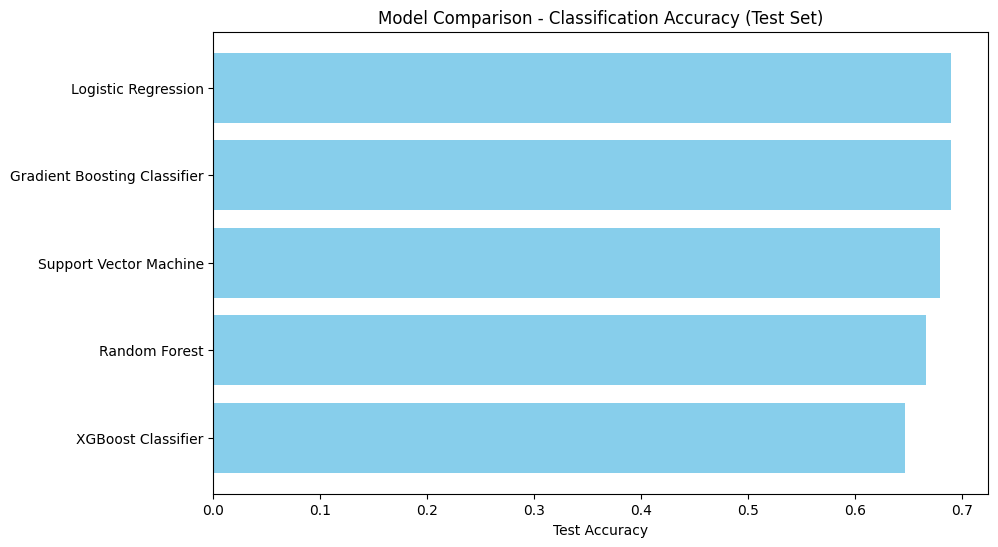

In [ ]:
cls_df = pd.DataFrame(classification_results).sort_values(by='Test Accuracy', ascending=False)
print("=== Classification Model Comparison ===")
display(cls_df)

best_classification = cls_df.iloc[0]
print("\n Best Classification Model:", best_classification['Model'])

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.barh(cls_df['Model'], cls_df['Test Accuracy'], color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Model Comparison - Classification Accuracy (Test Set)')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#  Save the Best Model
best_model_name = best_classification['Model']

if best_model_name == 'Logistic Regression':
    best_cls_model = log_clf
elif best_model_name == 'Random Forest':
    best_cls_model = rf_clf
elif best_model_name == 'XGBoost Classifier':
    best_cls_model = xgb_clf
elif best_model_name == 'Support Vector Machine':
    best_cls_model = svm_clf
elif best_model_name == 'Gradient Boosting Classifier':
    best_cls_model = gb_clf
else:
    best_cls_model = None

if best_cls_model:
    with open('best_classification_model.pkl', 'wb') as f:
        pickle.dump(best_cls_model, f)
    print(f" Saved best classification model: {best_model_name}")
else:
    print(f" Could not find the pipeline for best model: {best_model_name}")

 Saved best classification model: Logistic Regression
